In [1]:
import meep as mp
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Video


a = 0.000001  # unit scale in meep
c = 299792458  # speed of light in a vacuum

def freq_to_mp(frequency_in_hz):
    meep_freq = (frequency_in_hz * a)/c
    return meep_freq

def meter_to_mp(length_in_meters):
    aa = 1                                   # aa = 1 micro meter
    meep_length = length_in_meters/aa
    return meep_length

def sec_to_mp(time_in_secs):
    meep_time = time_in_secs*c/a
    return meep_time


In [20]:
#################################### material definition ##########################################


def LiN(p):
    eps_o = 4   #ordinary axis. y and z
    eps_e = 12  #extraordinary axis x
    ln_epsilon = mp.Matrix(mp.Vector3(eps_e, 0, 0), mp.Vector3(0, eps_o, 0), mp.Vector3(0, 0, eps_o))
    ln_epsilon_diag = mp.Vector3(ln_epsilon[0].x, ln_epsilon[1].y, ln_epsilon[2].z)
    return mp.Medium(epsilon_diag=ln_epsilon_diag)


###################################################################################################


In [23]:
def func():
    resolution = 20
    cell_x = 18
    cell_y = 14
    pml_width = 2
    cell_size = mp.Vector3(18, 14)
    pml_layers = [mp.PML(thickness=2)]

    #rot_angle = np.radians(20)
    geometry = [
        mp.Block(
            center=mp.Vector3(),
            size=mp.Vector3(mp.inf, 1, mp.inf),
            e1=mp.Vector3(1, 0, 0),
            e2=mp.Vector3(0, 1, 0),
            material=LiN,
        )
    ]
    fsrc = freq_to_mp(45e12) # frequency of eigenmode or constant-amplitude source
    print("freq, ", fsrc)
    kx = 1  # initial wavevector guess in x direction of the eigenmode
    kpoint = mp.Vector3(x=kx)
    bnum = 1  # band number of the eigenmode

    sources = [
        mp.EigenModeSource(
            #src=mp.ContinuousSource(fsrc, fwidth=0.5 * fsrc),
            src=mp.ContinuousSource(fsrc),
            center=mp.Vector3(-7),
            size=mp.Vector3(y=6),
            direction=mp.NO_DIRECTION,
            eig_kpoint=kpoint,
            eig_band=bnum,
            eig_match_freq=True,
        )
    ]

    sim = mp.Simulation(
        cell_size=cell_size,
        resolution=resolution,
        boundary_layers=pml_layers,
        sources=sources,
        geometry=geometry,
       
    )

    # Define xy plane
    animate = mp.Animate2D(sim, mp.Ez, normalize=True, realtime=True)
    sim.run(mp.at_every(1, animate), until=200)
    plt.show()
    plt.close()

    filename = "2d_anisotropicjup.gif"
    animate.to_gif(10, filename)

    
    ###################### E-Field amplitude #################################
    # output_plane = mp.Volume(center=mp.Vector3(), size=mp.Vector3(3, 1))
    output_plane = mp.Volume(center=mp.Vector3(), size=mp.Vector3(x=cell_x-(pml_width*2),y= 1)) #for absolute efield
    sim.run(until=200)
    ez_data = sim.get_array(component=mp.Ez, vol=output_plane) #amplitude profile at a plane
    ez_data_real = np.real(ez_data)
    
    ##################### make a plot of efield absolute value##############
    ez_abs = np.power(abs(ez_data_real), 2)
    #ez_abs = ez_data_real
    ez_abs_0 = ez_abs[:, 0]  #first column of the ez_data
    print("max of ez_abs_0: ", np.amax(ez_abs_0))  ### max value in the ez_abs_0 data
    print("\nE-field data type: ", type(ez_abs), "\n")
    a,b = np.shape(ez_data)
    print("a: ", a)
    guide_length = cell_x-(pml_width*2) # length of the waveguide. ie x-direction
    x_length = np.linspace(start=0, stop=guide_length, num=a) #discretized guide length

    
    ###################set plot parameters#######################
    plt.xlim(0, guide_length)
    plt.ylim(0, max(ez_abs_0))
    plt.xlabel("lenght (\u00B5m)")
    plt.ylabel("field strenght (V/\u00B5m)")
    plt.plot(x_length, ez_abs_0)
    plt.show()


freq,  0.15010384283916842
-----------
Initializing structure...
time for choose_chunkdivision = 0.00032711 s
Working in 2D dimensions.
Computational cell is 18 x 14 x 0 with resolution 20
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
time for set_epsilon = 5.04516 s
-----------
MPB solved for frequency_1(1,0,0) = 0.518444 after 27 iters
MPB solved for frequency_1(0.238132,0,0) = 0.170466 after 11 iters
MPB solved for frequency_1(0.189782,0,0) = 0.133411 after 84 iters
MPB solved for frequency_1(0.219616,0,0) = 0.149717 after 7 iters
MPB solved for frequency_1(0.220338,0,0) = 0.150104 after 5 iters
MPB solved for frequency_1(0.220338,0,0) = 0.150104 after 2 iters


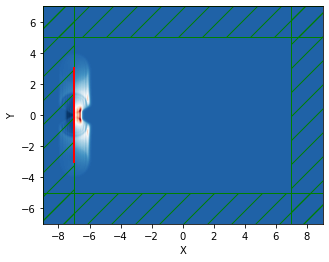

Meep progress: 4.7/100.0 = 4.7% done in 4.0s, 81.1s to go
on time step 188 (time=4.7), 0.021289 s/step
Meep progress: 11.875/100.0 = 11.9% done in 8.0s, 59.4s to go
on time step 476 (time=11.9), 0.0138921 s/step
Meep progress: 18.775000000000002/100.0 = 18.8% done in 12.0s, 52.0s to go
on time step 751 (time=18.775), 0.0145657 s/step
Meep progress: 28.0/100.0 = 28.0% done in 16.1s, 41.3s to go
on time step 1120 (time=28), 0.0108917 s/step
Meep progress: 37.575/100.0 = 37.6% done in 20.1s, 33.3s to go
on time step 1503 (time=37.575), 0.0104568 s/step
Meep progress: 48.0/100.0 = 48.0% done in 24.1s, 26.1s to go
on time step 1920 (time=48), 0.00967965 s/step
Meep progress: 57.975/100.0 = 58.0% done in 28.1s, 20.4s to go
on time step 2319 (time=57.975), 0.0100271 s/step
Meep progress: 68.0/100.0 = 68.0% done in 32.2s, 15.1s to go
on time step 2720 (time=68), 0.0100971 s/step
Meep progress: 78.0/100.0 = 78.0% done in 36.2s, 10.2s to go
on time step 3120 (time=78), 0.0100432 s/step
Meep prog

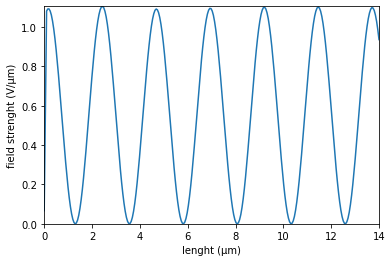

In [24]:
if __name__ == '__main__':
    func()
